## matplotlib・seaborn을 이용한 데이터 시각화 

### 파이썬을 이용한 데이터 시각화 

In [24]:
import numpy as np
import pandas as pd

%precision 3

from matplotlib import pyplot as plt

%matplotlib inline

## pyplot을 이용한 꺽은선 그래프 

In [25]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

Text(0, 0.5, 'y')

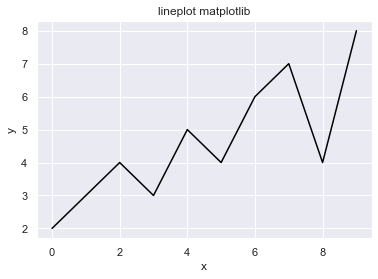

In [26]:
plt.plot(x, y, color = 'black')
plt.title("lineplot matplotlib")
plt.xlabel("x")
plt.ylabel("y")

### seaborn + pyplot 꺽은선 그래프 

In [27]:
import seaborn as sns
sns.set()

Text(0, 0.5, 'y')

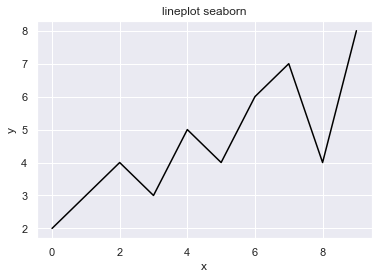

In [28]:
plt.plot(x, y, color = 'black')
plt.title("lineplot seaborn")
plt.xlabel("x")
plt.ylabel("y")

###  seaborn을 이용한 히스토그램

In [29]:
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

C:\Users\Seulki\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

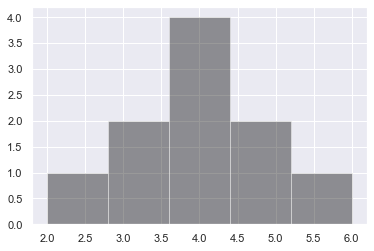

In [30]:
sns.distplot(fish_data, bins = 5,   #distplot 히스토그램 
             color = 'black', kde = False)

<AxesSubplot:ylabel='Density'>

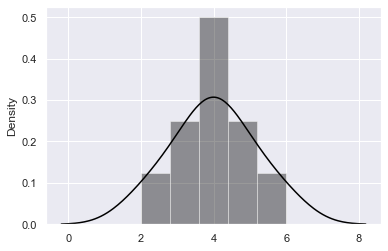

In [33]:
sns.distplot(fish_data, bins = 5, 
             color = 'black', kde = True)   #kde = 커널 밀도 함수 

### 커널밀도추정에 따른 히스토그램 평활화

<AxesSubplot:>

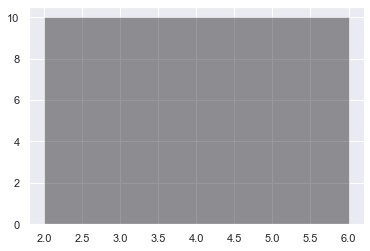

In [40]:
sns.distplot(fish_data, bins = 1, 
             color = 'black', kde = False)

<AxesSubplot:ylabel='Density'>

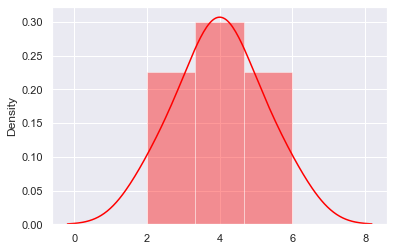

In [41]:
sns.distplot(fish_data, color = 'red')

### 2변량 데이터에 대한 히스토그램

In [12]:
fish_multi = pd.read_csv("3-3-2-fish_multi_2.csv")
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


In [13]:
print(fish_multi.groupby("species").describe())

        length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0


In [42]:
length_a = fish_multi.query('species == "A"')["length"]  #query 함수로 데이터 필터링 loc, iloc대신 사용 
length_b = fish_multi.query('species == "B"')["length"]

In [43]:
length_a

0    2
1    3
2    3
3    4
4    4
5    4
6    4
7    5
8    5
9    6
Name: length, dtype: int64

In [44]:
length_b

10    5
11    6
12    6
13    7
14    7
15    7
16    7
17    8
18    8
19    9
Name: length, dtype: int64

C:\Users\Seulki\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length'>

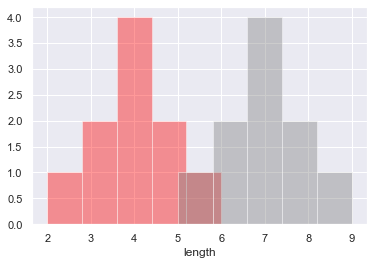

In [39]:
sns.distplot(length_a, bins = 5, 
             color = 'red', kde = False)
sns.distplot(length_b, bins = 5, 
             color = 'gray', kde = False)

### 다변량 데이터를 시각화하는 코드작성

<AxesSubplot:xlabel='species', ylabel='length'>

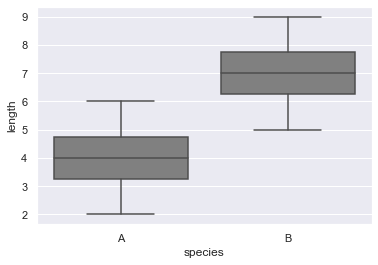

In [16]:
# 상자그림
sns.boxplot(x = "species", y  = "length", 
            data = fish_multi, color = 'gray')

In [17]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

<AxesSubplot:xlabel='species', ylabel='length'>

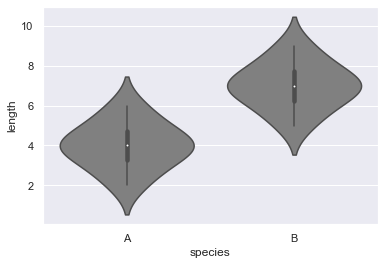

In [18]:
sns.violinplot(x = "species", y  = "length",     #바이올린플롯
               data = fish_multi, color = 'gray')

<AxesSubplot:xlabel='species', ylabel='length'>

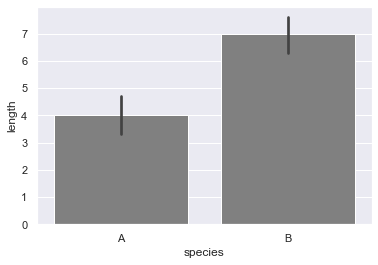

In [19]:
sns.barplot(x = "species", y  = "length",            #막대그래프 
            data = fish_multi, color = 'gray')

In [50]:
cov_data = pd.read_csv("3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


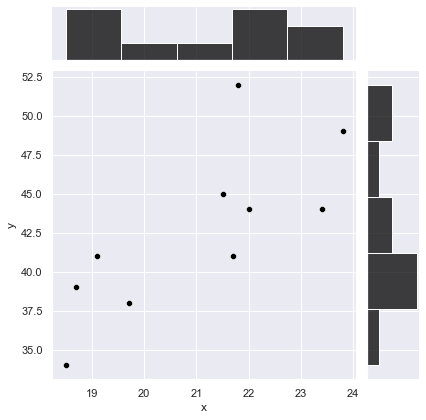

In [51]:
sns.jointplot(x = "x", y = "y",  #jointplot 히스토그램, 산점도 
              data = cov_data, color = 'black')

In [52]:
# seaborn에 내장되어 있는 붓꽃데이터 사용하기 
iris = sns.load_dataset("iris")
iris.head(n = 3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [53]:
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


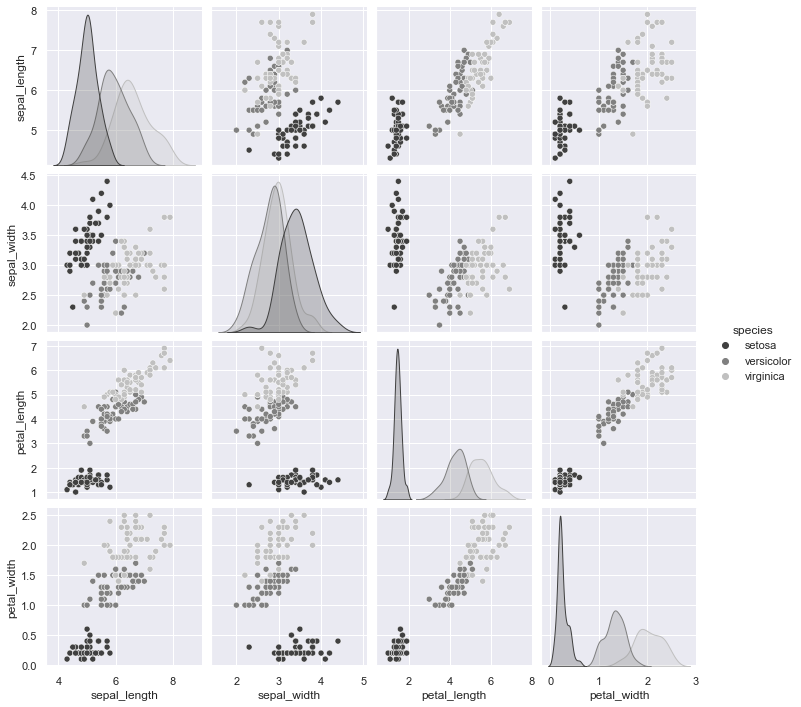

In [54]:
# 페어플롯
sns.pairplot(iris, hue="species", palette='gray')

#### 파이차트 그려보기

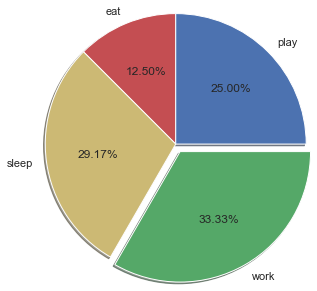

In [64]:
# column명 넣기 
activities = [ 'eat','sleep','work','play']

#값 넣기
slices = [3,7,8,6]

# 색깔
colors =['r','y','g','b']

#파이차트 그리기
plt.pie(slices, labels = activities, colors = colors,
              startangle = 90 ,shadow = True,
              explode = (0,0,0.1,0), radius = 1.5,
              autopct = '%1.2f%%') # 부채꼴에 표시될 숫자의 형식 소수점 한자리 


plt.show()